<a href="https://colab.research.google.com/github/scarmonaperez/MDST-Onboarding/blob/main/checkpoint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 1

Reminder:

- You are being evaluated for completion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [17]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
path = '/content/drive/My Drive/MDST/states_edu.csv'

df_statesEdu = pd.read_csv(path)
print(df_statesEdu.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [39]:
#renaming columns to better names for the columns
df_statesEdu.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

#dealing with missing data.
df_statesEdu.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df_statesEdu.dropna()
df_statesEdu['ENROLL_ALL'] = df_statesEdu['ENROLL_ALL'].fillna(df_statesEdu["ENROLL_PREK"]+df_statesEdu["ENROLL_PRIMARY"]+df_statesEdu["ENROLL_HS"])
df_statesEdu[df_statesEdu["ENROLL_ALL"].isna()][['ENROLL_PREK','ENROLL_PRIMARY','ENROLL_HS','ENROLL_ALL_EST']].notna().any()
df_statesEdu[df_statesEdu.ENROLL_ALL_EST.isna()]["ENROLL_ALL"].notna().sum()
((df_statesEdu["ENROLL_ALL"] - df_statesEdu["ENROLL_ALL_EST"])/df_statesEdu["ENROLL_ALL"]).describe()
df_statesEdu["ENROLL_ALL_EST"] = df_statesEdu["ENROLL_ALL_EST"].fillna(df_statesEdu["ENROLL_ALL"])
print(df_statesEdu.head())


       PRIMARY_KEY       STATE  YEAR  ENROLL_ALL_EST  TOTAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992        731634.0      2678885.0   
2     1992_ARIZONA     ARIZONA  1992        673477.0      3258079.0   
3    1992_ARKANSAS    ARKANSAS  1992        441490.0      1711959.0   
4  1992_CALIFORNIA  CALIFORNIA  1992       5254844.0     26260025.0   
5    1992_COLORADO    COLORADO  1992        612635.0      3185173.0   

   FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0         304177.0      1659028.0       715680.0          2653798.0   
2         297888.0      1369815.0      1590376.0          3401580.0   
3         178571.0       958785.0       574603.0          1743022.0   
4        2072470.0     16546514.0      7641041.0         27138832.0   
5         163253.0      1307986.0      1713934.0          3264826.0   

   INSTRUCTION_EXPENDITURE  ...  ENROLL_4  ENROLL_8  ENROLL_12  \
0                1481703.0  ...   57948.0   58025.0    41167.0   
2             

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

Choice:
Grade 4 Math

How many years of data are logged in our dataset?

In [43]:
df_statesEdu.YEAR.nunique()
print(df_statesEdu.YEAR.nunique())

13


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [45]:
df_statesEdu.groupby('STATE').AVG_MATH_4_SCORE.mean().sort_values(ascending=False)
print("Ohio has the higher average across all the years in the Math 4th Grade Tests.")

Ohio has the higher average across all the years in the Math 4th Grade Tests.


Find the average for your chosen test across all states in 2019

In [51]:
df_year2019 = df_statesEdu[df_statesEdu['YEAR'] == 2019]
avg_4thMath_perstate_2019 = df_year2019.groupby('STATE')['AVG_MATH_4_SCORE'].mean()
print(avg_4thMath_perstate_2019)

STATE
ALABAMA                 230.0
ALASKA                  232.0
ARIZONA                 238.0
ARKANSAS                233.0
CALIFORNIA              235.0
COLORADO                242.0
CONNECTICUT             243.0
DELAWARE                239.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 238.0
HAWAII                  239.0
IDAHO                   242.0
ILLINOIS                237.0
INDIANA                 245.0
IOWA                    241.0
KANSAS                  239.0
KENTUCKY                239.0
LOUISIANA               231.0
MAINE                   241.0
MARYLAND                239.0
MASSACHUSETTS           247.0
MICHIGAN                236.0
MINNESOTA               248.0
MISSISSIPPI             241.0
MISSOURI                238.0
MONTANA                 241.0
NATIONAL                241.0
NEBRASKA                244.0
NEVADA                  236.0
NEW_HAMPSHIRE           245.0
NEW_JERSEY              246.0
NEW_

For each state, find a maximum value for your chosen test score

In [52]:
df_statesEdu.groupby('STATE')['AVG_MATH_4_SCORE'].max()

,AVG_MATH_4_SCORE
STATE,
ALABAMA,233.0
ALASKA,237.0
ARIZONA,240.0
ARKANSAS,240.0
CALIFORNIA,235.0
COLORADO,247.0
CONNECTICUT,245.0
DELAWARE,243.0
DISTRICT_OF_COLUMBIA,235.0


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [56]:
df_statesEdu['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df_statesEdu['SUPPORT_SERVICES_EXPENDITURE'] / df_statesEdu['ENROLL_ALL']


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

In [55]:
print("I created the support services expenditure per student feature to see how the expenditure per state affects the test score for 4th graders.")

I created the support services expenditure per student feature to see how the expenditure per state affects the test score for 4th graders.


<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

There seems to be little to no correlation between the 4th grade math test score and the revenue that states input into the school system. States that spent more did just as well if not worse than states that spent less revenue.


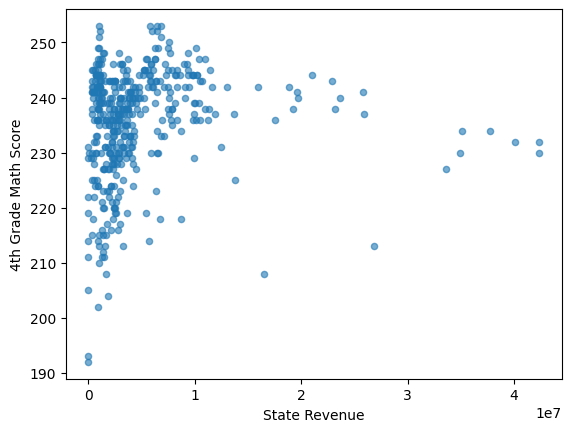

In [62]:
df_statesEdu.plot.scatter(x='STATE_REVENUE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('State Revenue')
plt.ylabel('4th Grade Math Score')
print("There seems to be little to no correlation between the 4th grade math test score and the revenue that states input into the school system. States that spent more did just as well if not worse than states that spent less revenue.")

**<CAPTION FOR VIZ 1>**

**Visualization 2**

There seems to be a positive correlation between the suppor services expenditure per student and the 4th grade math scores. As the expenditure per student increases, the 4th grade math score seems to increase as well. 


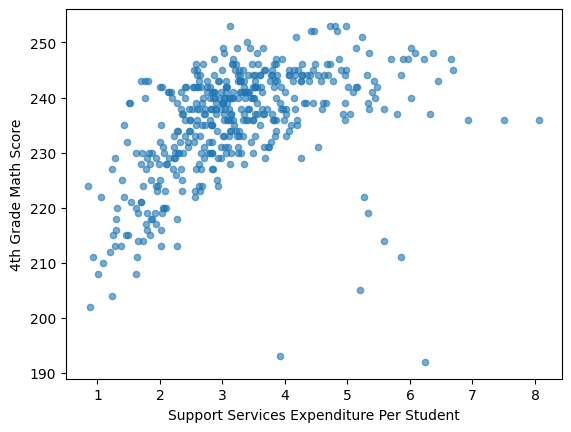

In [63]:
df_statesEdu.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Support Services Expenditure Per Student')
plt.ylabel('4th Grade Math Score')
print("There seems to be a positive correlation between the suppor services expenditure per student and the 4th grade math scores. As the expenditure per student increases, the 4th grade math score seems to increase as well. ")

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [73]:
from sklearn.model_selection import train_test_split

In [69]:
X = df_statesEdu[['ENROLL_4','AVG_MATH_4_SCORE','AVG_READING_4_SCORE']].dropna()
y = df_statesEdu.loc[X.index]['AVG_MATH_4_SCORE']

y.fillna(y.median(), inplace=True)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size= 3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [75]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [76]:
# create your model here
model = LinearRegression()

In [77]:
model.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [79]:
np.mean(np.abs(model.predict(X_test)-y_test))

np.mean((model.predict(X_test)-y_test)**2)**0.5

0.0

We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

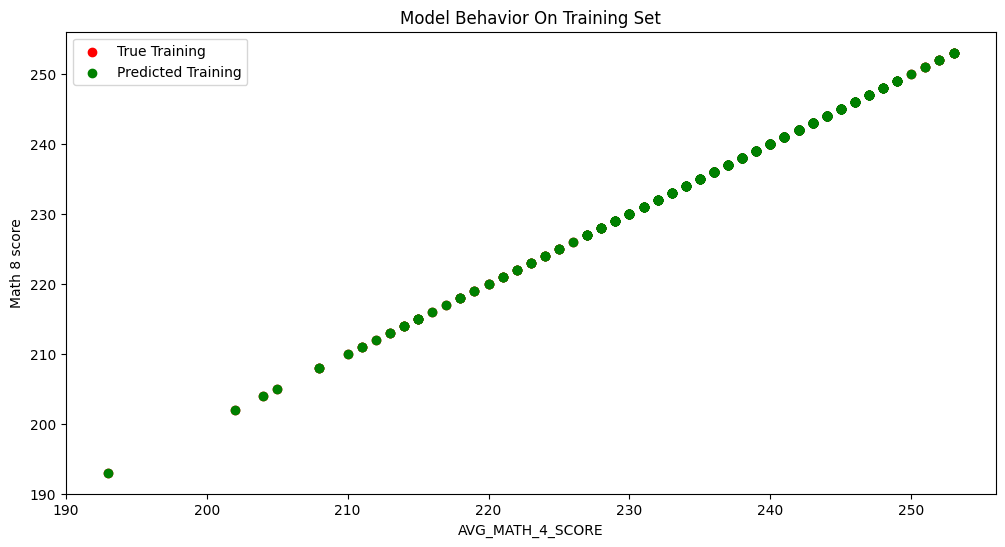

In [81]:
 col_name = 'AVG_MATH_4_SCORE'

 f = plt.figure(figsize=(12,6))
 plt.scatter(X_train[col_name], y_train, color = "red")
 plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

 plt.legend(['True Training','Predicted Training'])
 plt.xlabel(col_name)
 plt.ylabel('Math 8 score')
 plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

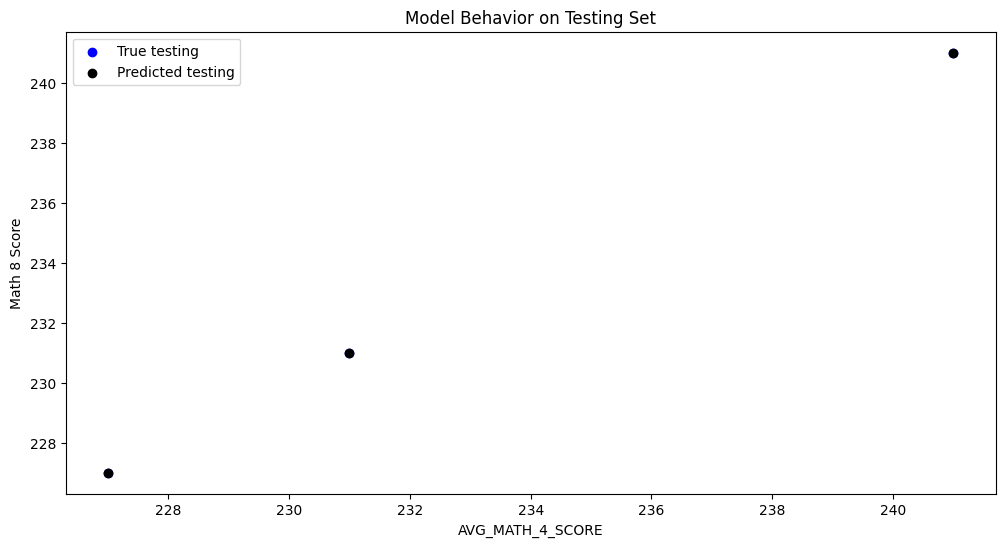

In [83]:
 col_name = 'AVG_MATH_4_SCORE'

 f = plt.figure(figsize=(12,6))
 plt.scatter(X_test[col_name], y_test, color = "blue")
 plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

 plt.legend(['True testing','Predicted testing'])
 plt.xlabel(col_name)
 plt.ylabel('Math 8 Score')
 plt.title("Model Behavior on Testing Set")